# Importing the Dataset and Preprocessing it

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"F:\COLLEGE\Extra courses\AIML\water-quality-1.csv\water-quality.csv")
df.isna().sum()


Sample ID                 0
Grab ID              376778
Profile ID                0
Sample Number             0
Collect DateTime          0
Depth (m)            376778
Site Type                 0
Area                    133
Locator                   0
Site                      0
Parameter                 0
Value                109085
Units                   780
QualityId                 0
Lab Qualifier       1110071
MDL                  651711
RDL                  653298
Text Value          1030752
Sample Info         1256301
Steward Note        1258764
Replicates          1257803
Replicate Of        1257913
Method               190439
Date Analyzed        691662
Data Source               0
dtype: int64

In [52]:
df.shape

(1259444, 25)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259444 entries, 0 to 1259443
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Sample ID         1259444 non-null  int64  
 1   Grab ID           882666 non-null   float64
 2   Profile ID        1259444 non-null  int64  
 3   Sample Number     1259444 non-null  object 
 4   Collect DateTime  1259444 non-null  object 
 5   Depth (m)         882666 non-null   float64
 6   Site Type         1259444 non-null  object 
 7   Area              1259311 non-null  object 
 8   Locator           1259444 non-null  object 
 9   Site              1259444 non-null  object 
 10  Parameter         1259444 non-null  object 
 11  Value             1150359 non-null  float64
 12  Units             1258664 non-null  object 
 13  QualityId         1259444 non-null  int64  
 14  Lab Qualifier     149373 non-null   object 
 15  MDL               607733 non-null   float64
 16  

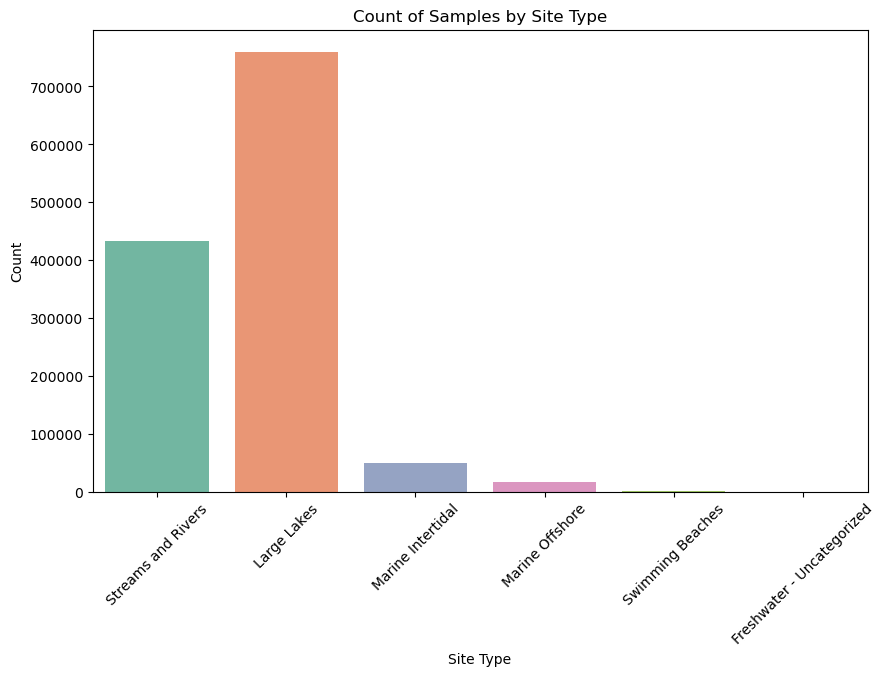

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Site Type', palette='Set2')
plt.title('Count of Samples by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [58]:
x = df.drop(['QualityId','Lab Qualifier','MDL','RDL','Text Value','Sample Info','Steward Note',
            'Replicates','Replicate Of','Method','Date Analyzed','Data Source'],axis = 1)
y = df['QualityId']
x

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,Parameter,Value,Units
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,Total Phosphorus,0.07000,mg/L
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,Nitrite + Nitrate Nitrogen,0.72700,mg/L
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,Temperature,18.90000,deg C
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,Orthophosphate Phosphorus,0.00724,mg/L
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,Temperature,8.94000,deg C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259439,185419,185419.0,78924,L73423-26,10/21/2019 10:38:00 AM,25.0,Marine Offshore,Central Puget Sound,KSSK02,West Point Outfall,Chlorophyll Field,1.20000,ug/L
1259440,185252,185252.0,78914,L73423-34,10/21/2019 11:45:00 AM,25.0,Marine Offshore,Central Puget Sound,LTED04,South Central Elliott Bay,Light Intensity (PAR),0.90000,umol/sm2
1259441,184301,184301.0,78849,L73423-17,10/21/2019 09:57:00 AM,14.8,Marine Offshore,Central Puget Sound,JSUR01,Point Wells,Density,1020.00000,kg/m3
1259442,183766,183766.0,78821,L73428-35,10/22/2019 01:09:00 PM,100.0,Marine Offshore,Central Puget Sound,NSEX01,East Passage,Dissolved Oxygen Field,5.50000,mg/L


In [60]:
y


0          2
1          2
2          2
3          2
4          2
          ..
1259439    1
1259440    1
1259441    1
1259442    1
1259443    1
Name: QualityId, Length: 1259444, dtype: int64

In [62]:
df.loc[df['QualityId'] > 1, 'QualityId'] = 0
df.loc[df['QualityId'] == 1, 'QualityId'] = 1
y = y.dropna()  # Assuming 'y' is a pandas Series or DataFrame
x = x.loc[y.index]  # Align 'x' with the remaining rows in 'y'
y

0          0
1          0
2          0
3          0
4          0
          ..
1259439    1
1259440    1
1259441    1
1259442    1
1259443    1
Name: QualityId, Length: 1259444, dtype: int64

# Dividing the Dataset in to Train and Test Data sets

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
string_cols = x.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder on the combined data of train and test for the specific column
for col in string_cols:
    # Combine unique values from both training and testing data
    all_values = list(x_train[col].unique()) + list(x_test[col].unique())
    encoder.fit(all_values)

    # Transform both training and testing data using the fitted encoder
    x_train[col] = encoder.transform(x_train[col])
    x_test[col] = encoder.transform(x_test[col])

(1007555, 13)
(251889, 13)
(1007555,)
(251889,)


# Importing and training the model Decision tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)



DecisionTreeClassifier()

## Predicting the target variable Quality ID
- if the y_pred is 0 which mean the water is not usefull for drinking
- if the y_pred is 1 then the water can be used for drinking

In [68]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226628
           1       1.00      1.00      1.00     25261

    accuracy                           1.00    251889
   macro avg       1.00      1.00      1.00    251889
weighted avg       1.00      1.00      1.00    251889



<Axes: >

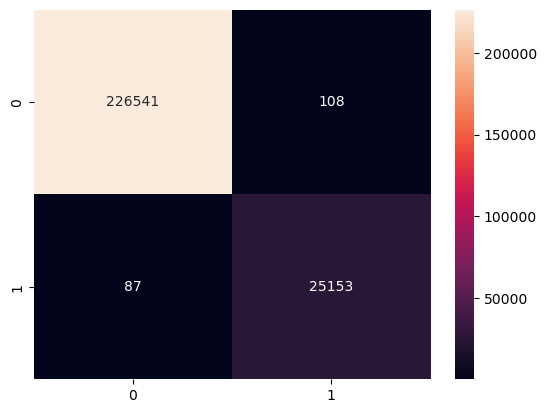

In [81]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt = 'd')